**IMPORTING PYTHON MODULES**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

**LOADING TESTING DATA**

In [2]:
train_data = pd.read_csv('data/train.csv')
print(train_data.shape)
train_data.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**EXPLORATORY DATA ANALYSIS**

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**HANDLING NULL VALUES**

In [5]:
# number of null values per column
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Replacing NaN value in column 'Age' with median of the column

# print(train_data.Age.median())  # 28.0
# print(train_data.Age.mean())  # 29.6
# print(train_data.Age.mode())  # 24.0

train_data.fillna({'Age' : train_data['Age'].median()}, inplace=True)

In [7]:
# Dropping rows with NaN value in Embarked column
train_data.dropna(subset=['Embarked'], inplace=True)

In [8]:
# Dropping column 'Cabin'
df = train_data.drop('Cabin', axis=1)
df.shape

(889, 11)

**DATA VISUALIZATION**

<Axes: xlabel='Embarked', ylabel='count'>

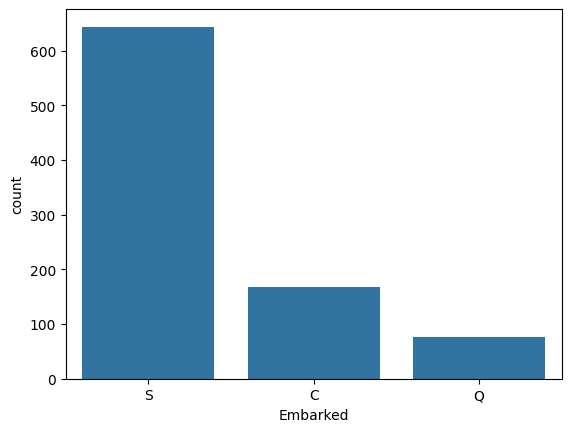

In [9]:
sns.countplot(data=df,x='Embarked')

<Axes: xlabel='Survived', ylabel='count'>

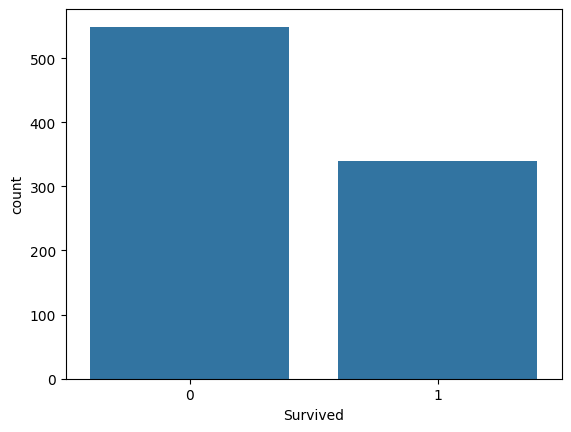

In [10]:
sns.countplot(data=df,x='Survived')

(array([ 54.,  46., 177., 346., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

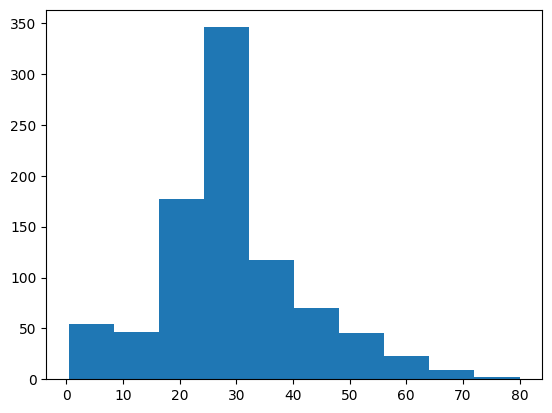

In [11]:
plt.hist(df['Age'],bins=10)

% of women survived :  0.7403846153846154
% of men survived : 0.18890814558058924


<Axes: xlabel='Sex', ylabel='count'>

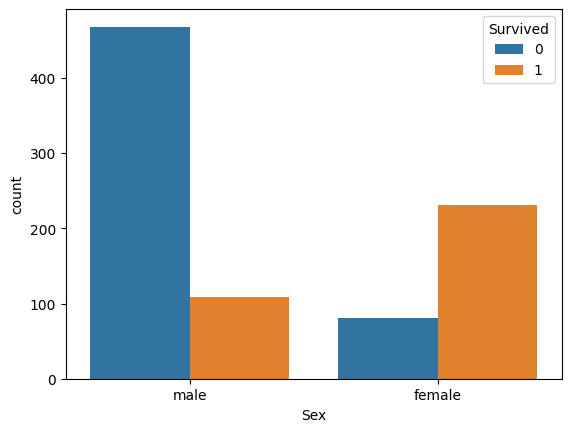

In [12]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
survival_rate_women = sum(women) / len(women)
print('% of women survived : ', survival_rate_women)

men = train_data.loc[train_data['Sex'] == 'male']['Survived']
survival_rate_men = sum(men) / len(men)
print('% of men survived :', survival_rate_men)



sns.countplot(data=df,x='Sex',hue='Survived')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.031319,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193
Age,0.031319,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707
SibSp,-0.057686,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000


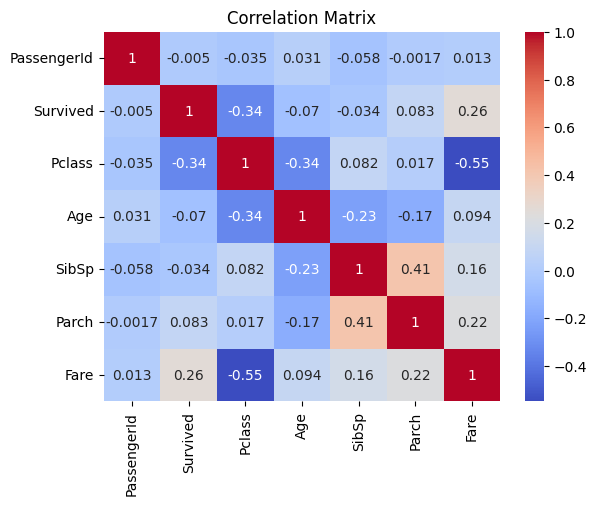

In [13]:
# correlation matrix of numerical features
sns.heatmap(df.select_dtypes(['number']).corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')

df.select_dtypes(include=['number']).corr()

In [14]:
# Adding new feature as 'FamilyMembers' combining column'SibSp' and 'Parch'
# Feature 'FamilyMembers' represents total number of family members
df['FamilyMembers'] = df['SibSp'] + df['Parch']

In [15]:
print(df.shape)
print(df.columns)
df.head()

(889, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilyMembers'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilyMembers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [16]:
df.drop(columns=['SibSp','Parch','Name','Ticket', 'Fare'], axis=1, inplace=True)

print(df.shape)
print(df.columns)

(889, 7)
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Embarked',
       'FamilyMembers'],
      dtype='object')


In [17]:
# Convert categorical columns to numeric using one-hot encoding
df1= pd.get_dummies(data = df, columns = ['Sex','Embarked'], drop_first = True).astype(int)
df1.head()

,PassengerId,Survived,Pclass,Age,FamilyMembers,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22,1,1,0,1
1,2,1,1,38,1,0,0,0
2,3,1,3,26,0,0,0,1
3,4,1,1,35,1,0,0,1
4,5,0,3,35,0,1,0,1


In [18]:
Y = df1['Survived'] 
X = df1.drop(columns=['Survived'],axis = 1)

In [19]:
# splitting data into x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(622, 7) (622,) (267, 7) (267,)


In [20]:
# Scaling data
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [21]:
# SVC
svc = SVC(C=0.7, kernel='rbf', gamma='auto', max_iter=1000)
svc.fit(x_train_scaled, y_train)

y_pred_svc = svc.predict(x_test_scaled)

print("SVC:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

SVC:
Accuracy Score: 0.8052434456928839
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       167
           1       0.80      0.64      0.71       100

    accuracy                           0.81       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.81      0.80       267



In [22]:
# Random forest
rf=RandomForestClassifier(n_estimators=100, criterion='gini')
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

print("RandomForestClassifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

RandomForestClassifier:
Accuracy Score: 0.7790262172284644
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       167
           1       0.73      0.65      0.69       100

    accuracy                           0.78       267
   macro avg       0.77      0.75      0.76       267
weighted avg       0.78      0.78      0.78       267



**TESTING DATA**

In [23]:
test_data = pd.read_csv('data/test.csv')
print(test_data.shape)
test_data.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
# handling NaN values
test_data.fillna({'Age' : train_data['Age'].median()}, inplace=True)

In [26]:
# Adding column
test_data['FamilyMembers'] = test_data['SibSp'] + test_data['Parch']
test_data.shape

(418, 12)

In [27]:
# dropping columns
test_data.drop(columns=['Cabin', 'SibSp','Parch','Name','Ticket', 'Fare'], axis=1, inplace=True)

print(test_data.shape)
print(test_data.columns)
test_data.head()

(418, 6)
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Embarked', 'FamilyMembers'], dtype='object')


,PassengerId,Pclass,Sex,Age,Embarked,FamilyMembers
0,892,3,male,34.5,Q,0
1,893,3,female,47.0,S,1
2,894,2,male,62.0,Q,0
3,895,3,male,27.0,S,0
4,896,3,female,22.0,S,2


In [28]:
# Convert categorical columns to numeric
df_test= pd.get_dummies(data = test_data, columns = ['Sex','Embarked'], drop_first = True).astype(int)
df_test.head()

,PassengerId,Pclass,Age,FamilyMembers,Sex_male,Embarked_Q,Embarked_S
0,892,3,34,0,1,1,0
1,893,3,47,1,0,0,1
2,894,2,62,0,1,1,0
3,895,3,27,0,1,0,1
4,896,3,22,2,0,0,1


In [29]:
# Scaling data
scaler = StandardScaler()

x_test_scaled = scaler.fit_transform(df_test)

In [30]:
# SVC as it has best result
y_pred_svc = svc.predict(x_test_scaled)
print(y_pred_svc)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 0 1 0 1 1 0 1 0 0 0]
